<a href="https://colab.research.google.com/github/egyptai/KNN/blob/main/KNNMnist20210603.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
x_train = x_train[:5000]
y_train = y_train[:5000]
x_test = x_test[:1000]
y_test = y_test[:1000]

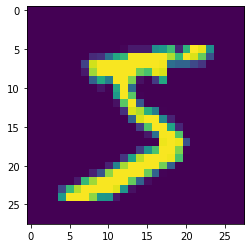

In [4]:
plt.imshow(x_train[0])
plt.show()

In [5]:
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

In [6]:
x_train.shape

(5000, 784)

In [7]:
x_train = x_train / 255
x_test = x_test / 255

In [8]:
knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [9]:
y_pred = knn.predict(x_test)
accuracy = (y_test == y_pred).mean()
print()
print("* 시험용 데이터로 측정한 정확도 = %.2f" % accuracy)


* 시험용 데이터로 측정한 정확도 = 0.91


In [10]:
n_sample = 10
miss_cls = np.where(y_test != y_pred)[0]
miss_sam = np.random.choice(miss_cls, n_sample)

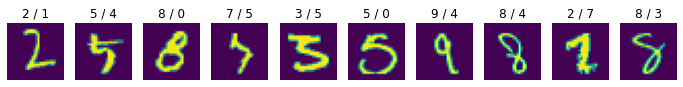

In [15]:
fig, ax = plt.subplots(1, n_sample, figsize = (12,4))
for i, miss in enumerate(miss_sam):
    x = x_test[miss] * 255
    x = x.reshape(28, 28)
    ax[i].imshow(x)
    ax[i].axis('off')
    ax[i].set_title(str(y_test[miss]) + ' / ' + str(y_pred[miss]))
plt.show()